# 3. summarizing and exploring the "iris.csv" dataset.

In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv("HW1_data/iris/iris.csv")

print(df.head())
print(df.info())
print(df.describe())

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667

(a) Compute the mean, median, standard deviation, range, 25th percentile, 50th percentile, and 75th percentile for the following attributes: sepallength, sepalwidth, petallength, petalwidth

In [28]:
features = ["sepallength", "sepalwidth", "petallength", "petalwidth"]
agg_stats = df[features].agg(["mean", "median", "std", "min", "max"]).T

q = df[features].quantile([0.25, 0.50, 0.75]).T
agg_stats["25%"] = q[0.25]
agg_stats["50%"] = q[0.50]
agg_stats["75%"] = q[0.75]

agg_stats["range"] = agg_stats["max"] - agg_stats["min"]

summary = agg_stats[["mean", "median", "std", "range", "25%", "50%", "75%"]]
print(summary)

                 mean  median       std  range  25%   50%  75%
sepallength  5.843333    5.80  0.828066    3.6  5.1  5.80  6.4
sepalwidth   3.054000    3.00  0.433594    2.4  2.8  3.00  3.3
petallength  3.758667    4.35  1.764420    5.9  1.6  4.35  5.1
petalwidth   1.198667    1.30  0.763161    2.4  0.3  1.30  1.8


(b) Make box-and-whisker plots for the attributes sepallength and sepalwidth grouped by the class label. Be sure to include a title for each plot to describe what feature is being displayed.

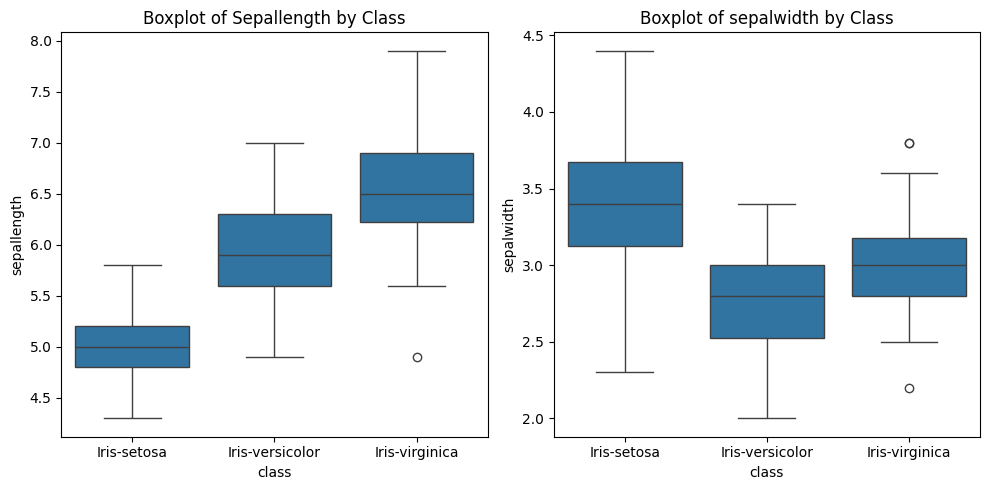

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="class", y="sepallength", data=df)
plt.title("Boxplot of Sepallength by Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="class", y="sepalwidth", data=df)
plt.title("Boxplot of sepalwidth by Class")

plt.tight_layout()
plt.show()

(c) Create histogram plots using 16 bins for the two features petallenght and petalwidth, repectively.

<function matplotlib.pyplot.show(close=None, block=None)>

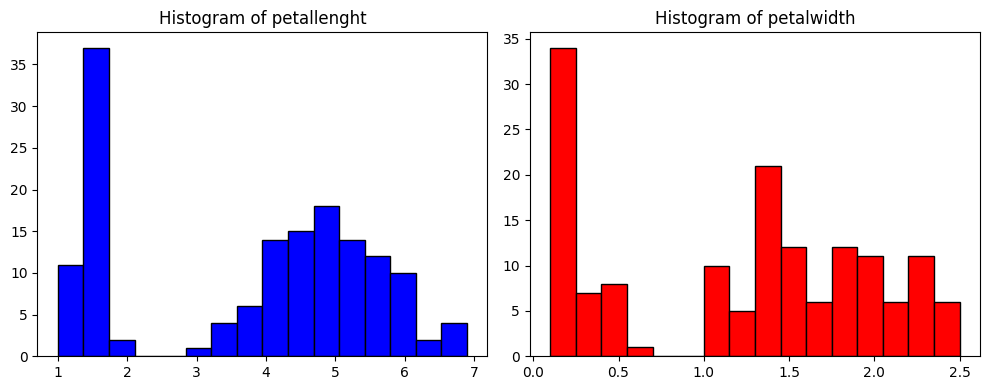

In [30]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df["petallength"], bins=16, color="blue", edgecolor="black")
plt.title("Histogram of petallenght")

plt.subplot(1, 2, 2)
plt.hist(df["petalwidth"], bins=16, color="red", edgecolor="black")
plt.title("Histogram of petalwidth")

plt.tight_layout()
plt.show

(d) Create a scatter matrix of the data. Include only the following features: sepallength, sepalwidth, petallenght, and petalwidth.
Use the classes attribute to change the color of the data points (for convenience, you may use a library for this). For the diagonal of scatter matrix, plot the kernel density estimation (KDE).

https://seaborn.pydata.org/generated/seaborn.pairplot.html

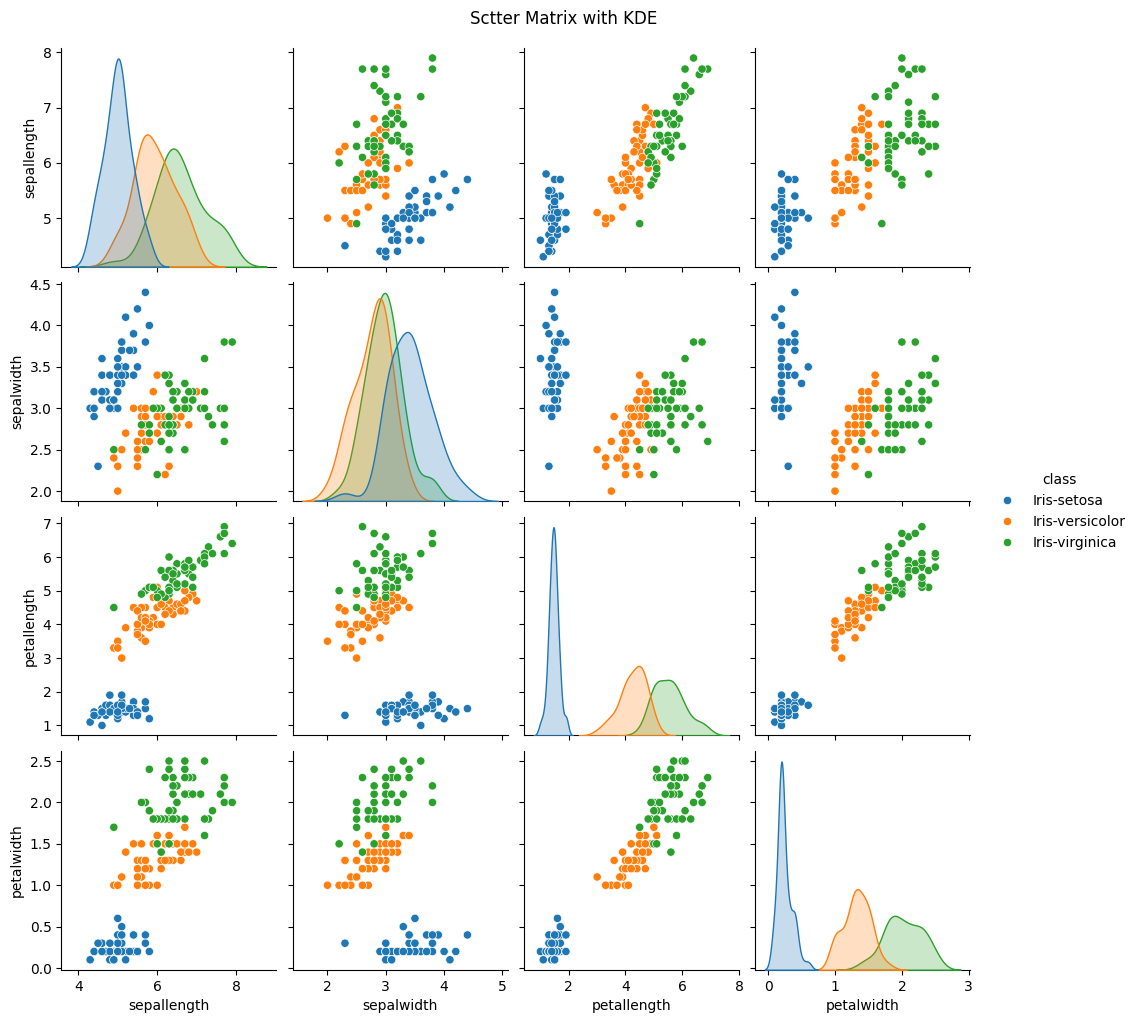

In [31]:
sns.pairplot(df[features + ["class"]], hue="class", diag_kind="kde")
plt.suptitle("Sctter Matrix with KDE", y=1.02)
plt.show()

(e) Write code to produce a three-dimensional scatter plot using sepallength, sepalwidth, and petallength as dimensions, and color the data points according to the classes attribute.

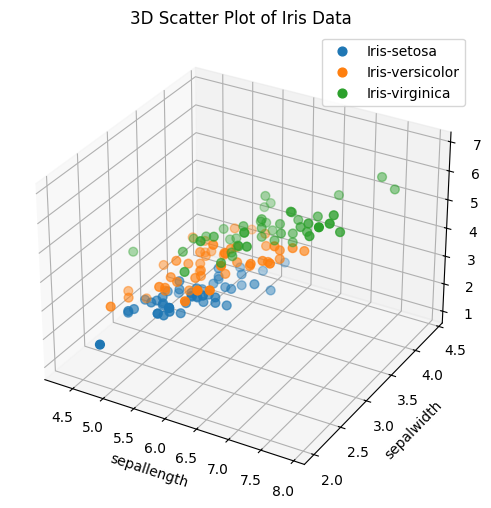

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
colors = plt.cm.tab10.colors

for i, c in enumerate(df["class"].unique()):
    subset = df[df["class"] == c]
    ax.scatter(
        subset["sepallength"],
        subset["sepalwidth"],
        subset["petallength"],
        marker = 'o',
        color = colors[i],
        label=c,
        s=40
    )

ax.set_xlabel("sepallength")
ax.set_ylabel("sepalwidth")
ax.set_zlabel("petallength")

plt.title("3D Scatter Plot of Iris Data")
plt.legend()
plt.show()

(f) The quantile-quantile plot can be used for comparing the distribution of data against the normal distribution. Create a quantile-quantile plot for the two features sepallength and sepalwidth, respectively. Provide a brief analysis of the two plots.

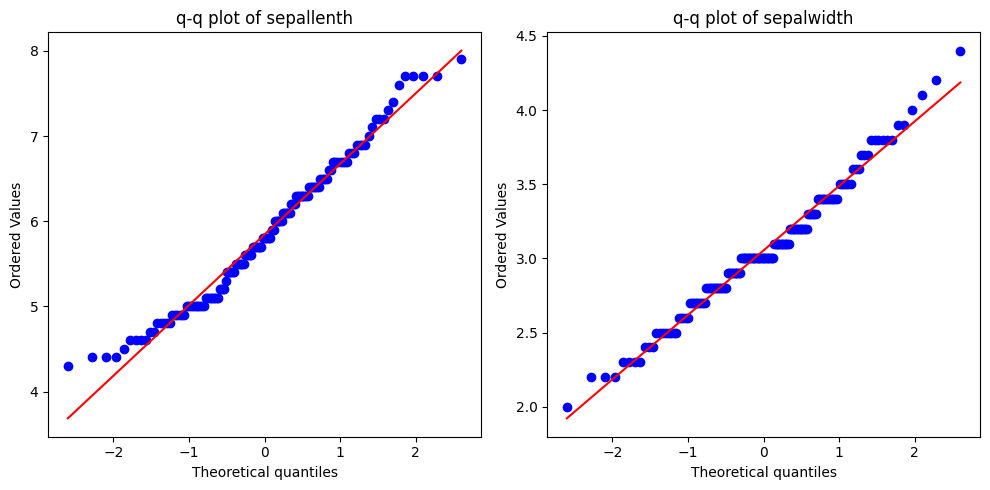

In [33]:
import scipy.stats as stats

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
stats.probplot(df["sepallength"], dist="norm", plot=plt)
plt.title("q-q plot of sepallenth")


plt.subplot(1, 2, 2)
stats.probplot(df["sepalwidth"], dist="norm", plot=plt)
plt.title("q-q plot of sepalwidth")

plt.tight_layout()
plt.show()

The closer the points are to the diagonal, the closer the data follow a normal distribution. sepallength deviates from normality more than sepalwidth.